<a href="https://colab.research.google.com/github/tvelichkovt/TensorFlow/blob/master/TF_021_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf "import"

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('TensorFlow ver is:', tf.__version__, '\nKeras ver is:', keras.__version__, '\nPandas ver is:', pd.__version__, '\nNumpy ver is:', np.__version__)

2.1.0


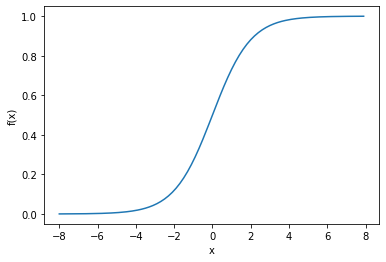

In [ ]:
#https://adventuresinmachinelearning.com/neural-networks-tutorial/

import matplotlib.pylab as plt
import numpy as np
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

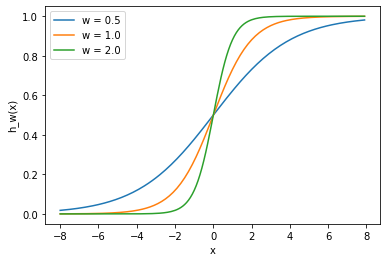

In [ ]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1 / (1 + np.exp(-x*w))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
plt.show()

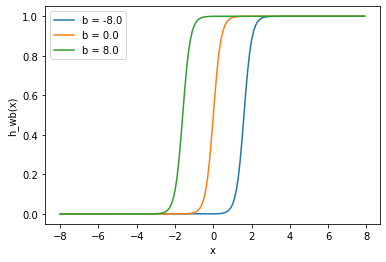

In [ ]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc=2)
plt.show()

In [ ]:
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])
w2 = np.zeros((1, 3))
w2[0,:] = np.array([0.5, 0.5, 0.5])

In [ ]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

def f(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def simple_looped_nn_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        #Setup the input array which the weights will be multiplied by for each layer
        #If it's the first layer, the input array will be the x input vector
        #If it's not the first layer, the input to the next layer will be the 
        #output of the previous layer
        if l == 0:
            node_in = x
        else:
            node_in = h
        #Setup the output array for the nodes in layer l + 1
        h = np.zeros((w[l].shape[0],))
        #loop through the rows of the weight array
        for i in range(w[l].shape[0]):
            #setup the sum inside the activation function
            f_sum = 0
            #loop through the columns of the weight array
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            #add the bias
            f_sum += b[l][i]
            #finally use the activation function to calculate the
            #i-th output i.e. h1, h2, h3
            h[i] = f(f_sum)
    return h

In [ ]:
w = [w1, w2]
b = [b1, b2]
#a dummy x input vector
x = [1.5, 2.0, 3.0]

In [ ]:
simple_looped_nn_calc(3, x, w, b)


array([0.83545566])

In [ ]:
%timeit simple_looped_nn_calc(3, x, w, b)


10000 loops, best of 3: 22.6 µs per loop


In [ ]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

In [ ]:
#Gradient descent and optimisation

x_old = 0 # The value does not matter as long as abs(x_new - x_old) > precision
x_new = 6 # The algorithm starts at x=6
gamma = 0.01 # step size
precision = 0.00001

def df(x):
    y = 4 * x**3 - 9 * x**2
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new += -gamma * df(x_old)

print("The local minimum occurs at %f" % x_new)

The local minimum occurs at 2.249965


(1797, 64)


<Figure size 432x288 with 0 Axes>

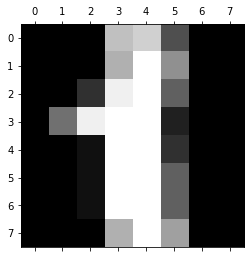

In [ ]:
#Implementing the neural network in Python

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show()

In [ ]:
digits.data[0,:]
Out[2]:
array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

SyntaxError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]
Out[3]:
array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

SyntaxError: ignored